**N-01 LINEAR REGRESSION (SLR AND MLR)**

 - Prediksi kematian selama pengobatan
 - Sumber dataset dari ***Open Data Bantul***

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import dataset
link = 'https://raw.githubusercontent.com/iyanrspian/uts-machine-learning/main/cure-success-rate-tb.csv'
data = pd.read_csv(link)
data.head()

,puskesmas,kecamatan,cure_rate,succese_rate,kematian_selama_pengobatan
0,Srandakan,SRANDAKAN,60,60,1
1,Sanden,SANDEN,75,75,1
2,Kretek,KRETEK,100,100,0
3,Pundong,PUNDONG,70,70,1
4,Bambanglipuro,BAMBANGLIPURO,80,80,1


A. Simple Linear Regresion

In [3]:
# Update dataset yang akan diperlukan saja untuk SLR
data_slr = pd.read_csv(link, usecols=['succese_rate', 'kematian_selama_pengobatan'])
data_slr.tail()

,succese_rate,kematian_selama_pengobatan
22,57,78
23,89,88
24,100,0
25,100,0
26,100,0


In [4]:
# Membuat variabel X, y dan split data (training & testing) dengan porsi 80:20
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data_slr['succese_rate'].values.reshape(-1,1)
y = data_slr['kematian_selama_pengobatan'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Membuat object Linear Regression dan Training Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
# Menghitung mean, standard deviation dan variance
result_slr = data_slr.describe().loc[['mean', 'std']]
result_slr.loc['variance'] = result_slr.loc['std']**2
print(result_slr)

          succese_rate  kematian_selama_pengobatan
mean         79.962963                   37.444444
std          18.984774                   39.998397
variance    360.421652                 1599.871795


In [6]:
# Menghitung covariance dan coeffisient of correlation
print("'Covariance'\n\n", data_slr.cov())
print("\n'Coeffisient of Correlation - Pearson Method'\n\n", data_slr.corr(method="pearson"))

'Covariance'

                             succese_rate  kematian_selama_pengobatan
succese_rate                  360.421652                 -445.482906
kematian_selama_pengobatan   -445.482906                 1599.871795

'Coeffisient of Correlation - Pearson Method'

                             succese_rate  kematian_selama_pengobatan
succese_rate                    1.000000                   -0.586655
kematian_selama_pengobatan     -0.586655                    1.000000


In [7]:
# Mencari tahu nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[-1.0232951]]
[121.05289472]


In [8]:
# Mencari tahu accuracy score dari model, menggunakan testing data yang sudah displit sebelumnya.
accuracy = lin_reg.score(X_test, y_test)
print("\nAccuracy score :", str(round(accuracy, 2)*100) + '%')


Accuracy score : 74.0%


In [9]:
# Prediksi dengan nilai cure_rate sebagai berikut
print("[63] =", lin_reg.predict([[63]]))
print("[59] =", lin_reg.predict([[59]]))
print("[71] =", lin_reg.predict([[71]]))

[63] = [[56.58530321]]
[59] = [[60.67848362]]
[71] = [[48.39894238]]


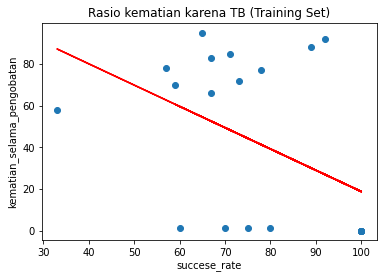

In [10]:
# Visualisasi (train set)
y_predict = lin_reg.predict(X_train)
plt.scatter(X_train, y_train)
plt.plot(X_train, y_predict, color='red')
plt.title('Rasio kematian karena TB (Training Set)')
plt.xlabel('succese_rate')
plt.ylabel('kematian_selama_pengobatan')
plt.show()

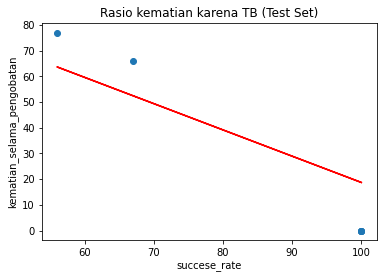

In [11]:
# Visualisasi (test set)
y_predict = lin_reg.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict, color='red')
plt.title('Rasio kematian karena TB (Test Set)')
plt.xlabel('succese_rate')
plt.ylabel('kematian_selama_pengobatan')
plt.show()

B. Multiple Linear Regression

In [12]:
# Update dataset yang akan diperlukan saja untuk MLR
data_mlr = pd.read_csv(link, usecols=['cure_rate', 'succese_rate', 'kematian_selama_pengobatan'])
data_mlr.head()

,cure_rate,succese_rate,kematian_selama_pengobatan
0,60,60,1
1,75,75,1
2,100,100,0
3,70,70,1
4,80,80,1


In [13]:
# Menentukan variabel x,y dan splitting dataset menjadi train dan test set (80:20)
Xs = data_mlr[['cure_rate', 'succese_rate']].values
ys = data_mlr['kematian_selama_pengobatan'].values
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size = 0.2)

In [14]:
print(Xs)

[[ 60  60]
 [ 75  75]
 [100 100]
 [ 70  70]
 [ 80  80]
 [100 100]
 [100 100]
 [ 72  73]
 [ 77  78]
 [ 95  65]
 [100 100]
 [ 55  56]
 [ 66  67]
 [ 66  67]
 [100 100]
 [ 58  33]
 [ 76  92]
 [ 70  59]
 [100 100]
 [ 66  67]
 [ 85  71]
 [100 100]
 [ 78  57]
 [ 88  89]
 [100 100]
 [100 100]
 [100 100]]


In [15]:
print(ys)

[ 1  1  0  1  1  0  0 72 77 95  0 77 83 66  0 58 92 70  0 66 85  0 78 88
  0  0  0]


In [16]:
# Mengetahui nilai mean, standar deviasi dan varians
result_mlr = data_mlr.describe().loc[['mean', 'std']]
result_mlr.loc['variance'] = result_mlr.loc['std']**2
print(result_mlr)

           cure_rate  succese_rate  kematian_selama_pengobatan
mean       82.851852     79.962963                   37.444444
std        15.822826     18.984774                   39.998397
variance  250.361823    360.421652                 1599.871795


In [17]:
# Mengetahui nilai covariance dan coeffisient of correlation
print("'Covariance'\n\n", data_mlr.cov())
print("\n'Coeffisient of Correlation - Pearson Method'\n\n", data_mlr.corr(method="pearson"))

'Covariance'

                              cure_rate  ...  kematian_selama_pengobatan
cure_rate                   250.361823  ...                 -331.008547
succese_rate                260.763533  ...                 -445.482906
kematian_selama_pengobatan -331.008547  ...                 1599.871795

[3 rows x 3 columns]

'Coeffisient of Correlation - Pearson Method'

                             cure_rate  succese_rate  kematian_selama_pengobatan
cure_rate                    1.000000      0.868075                   -0.523013
succese_rate                 0.868075      1.000000                   -0.586655
kematian_selama_pengobatan  -0.523013     -0.586655                    1.000000


In [18]:
# Mengetahui nilai korelasi
data_mlr.corr().style.background_gradient().set_precision(2)

,cure_rate,succese_rate,kematian_selama_pengobatan
cure_rate,1.00,0.87,-0.52
succese_rate,0.87,1.00,-0.59
kematian_selama_pengobatan,-0.52,-0.59,1.00


In [19]:
# Training model MLR pada train set
regr = LinearRegression()
regr.fit(Xs_train, ys_train)
Yhat = regr.predict(Xs_test)
print('Coefficient :', regr.coef_)
print('Intercept   :', regr.intercept_)
print('R-Squared   :', regr.score(Xs_test, ys_test))

Coefficient : [-0.42539796 -0.97260895]
Intercept   : 155.22551297004452
R-Squared   : -0.7139136083224844


In [20]:
# Prediksi hasil test set
ys_predict = regr.predict(Xs_test)
np.set_printoptions(precision=1)
print('Prediksi', regr.predict([[85,70]]))
print('\nPrediksi (y) :\n\n',np.concatenate((ys_predict.reshape(len(ys_predict),1), ys_test.reshape(len(ys_test),1)),1))

Prediksi [51.]

Prediksi (y) :

 [[71.3  1. ]
 [15.4  0. ]
 [43.4  1. ]
 [46.6 77. ]
 [15.4  0. ]
 [15.4  0. ]]


In [21]:
# Metrics Score
from sklearn import metrics
print('Mean Absolute Error     :', metrics.mean_absolute_error(ys_test, ys_predict))
print('Mean Squared Error      :', metrics.mean_squared_error(ys_test, ys_predict))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(ys_test, ys_predict)))

Mean Absolute Error     : 31.566358958694327
Mean Squared Error      : 1397.0776343395364
Root Mean Squared Error : 37.37750171345774


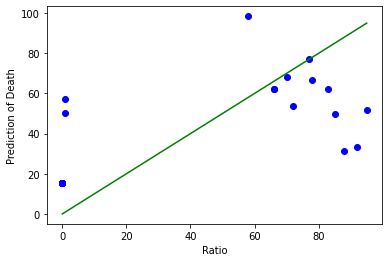

In [22]:
# Visualisasi (test set)
ys_train_predict = regr.predict(Xs_train)
plt.scatter(ys_train, ys_train_predict, color = "b", marker = "o" )
plt.plot([ys_train.min(), ys_train.max()], [ys_train.min(), ys_train.max()], color = 'g')
plt.xlabel('Ratio')
plt.ylabel('Prediction of Death')
plt.show()

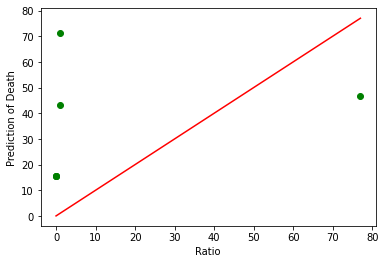

In [23]:
# Visualisasi (test set)
ys_test_predict = regr.predict(Xs_test)
plt.scatter(ys_test, ys_test_predict, color = "g", marker = "o" )
plt.plot([ys_test.min(), ys_test.max()], [ys_test.min(), ys_test.max()], color = 'r')
plt.xlabel('Ratio')
plt.ylabel('Prediction of Death')
plt.show()

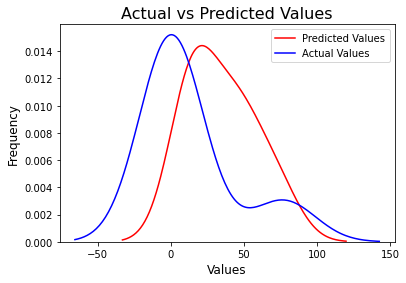

In [24]:
# Visualisasi plot nilai aktual dan prediksi
import seaborn as sns

sns.kdeplot(Yhat, color = 'r', label = 'Predicted Values')
sns.kdeplot(ys_test, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 10)
plt.show()